In [5]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
features = ["pclass","sex","embarked","age","fare"]
target = ["survived"]

In [14]:
# missing data 
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(strategy = "median")
df[["age"]] = imp_median.fit_transform(df[["age"]])

imp_mode = SimpleImputer(strategy = "most_frequent")
df[["embarked"]] = imp_mode.fit_transform(df[["embarked"]])

In [19]:
# Label encoding 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df["age"] = le.fit_transform(df["age"])
df["embarked"] = le.fit_transform(df["embarked"])
df["sex"] = le.fit_transform(df["sex"])

In [20]:
# Train test split
X = df[features]
y = df[target]

X_train , X_test , y_train , y_test = train_test_split(
    X , y , test_size = 0.2 , random_state = 42
)

In [21]:
X_train.head()

,pclass,sex,embarked,age,fare
331,1,1,2,60,28.5000
733,2,1,2,29,13.0000
382,3,1,2,42,7.9250
704,3,1,2,34,7.8542
813,3,0,2,10,31.2750


# Decision Trees -- no pruning

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train ,y_train )

DecisionTreeClassifier()

In [23]:
# Accuracy score
y_pred = model.predict(X_test)
print("Accuracy score : " , accuracy_score(y_test , y_pred))

Accuracy score :  0.770949720670391


<function matplotlib.pyplot.show(close=None, block=None)>

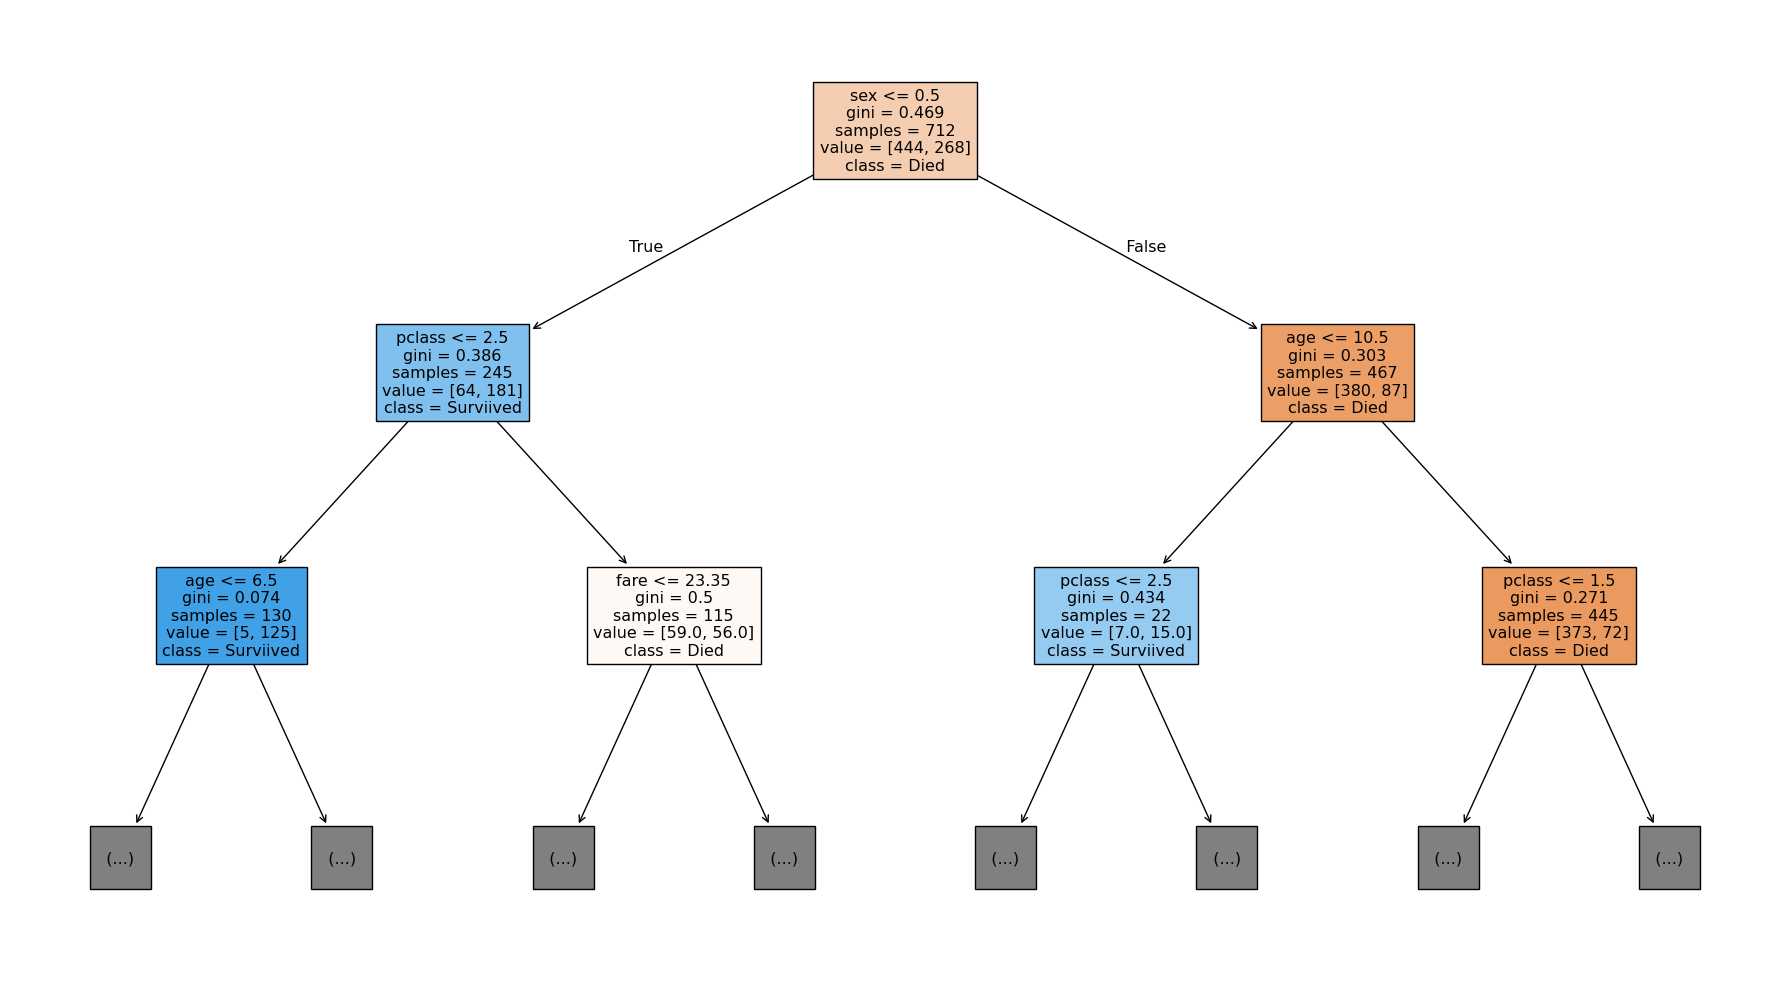

In [42]:
# Plotting decision tree
from sklearn.tree import plot_tree
plt.figure(figsize = (18,10))
plot_tree(
    model,
    feature_names = X.columns,
    class_names = ["Died","Surviived"],
    filled = True,
    max_depth = 2
)
plt.tight_layout()
plt.show

# Decision tree with Pre-Prunning

In [44]:
depths = [2,3,4,5,6,7,8,9,10]

for depth in depths:
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train , y_train)
    
    acc = model.score(X_test , y_test)
    print(f"Accuracy for {depth} : {acc}")

Accuracy for 2 : 0.7653631284916201
Accuracy for 3 : 0.7988826815642458
Accuracy for 4 : 0.7988826815642458
Accuracy for 5 : 0.7988826815642458
Accuracy for 6 : 0.8044692737430168
Accuracy for 7 : 0.8044692737430168
Accuracy for 8 : 0.8156424581005587
Accuracy for 9 : 0.8100558659217877
Accuracy for 10 : 0.8156424581005587


In [46]:
sample_splits = [5,10,15,20,25,30]

for split in sample_splits:
    model = DecisionTreeClassifier(max_depth = 8 ,min_samples_split = split )
    model.fit(X_train , y_train)
    
    acc = model.score(X_test , y_test)
    print(f"Accuracy for {split} : {acc}")

Accuracy for 5 : 0.8044692737430168
Accuracy for 10 : 0.8379888268156425
Accuracy for 15 : 0.8379888268156425
Accuracy for 20 : 0.8379888268156425
Accuracy for 25 : 0.8212290502793296
Accuracy for 30 : 0.8100558659217877
